# (1) 데이터 가져오기

In [35]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()

df_x = (diabetes.data)
df_y = (diabetes.target)

# (2) 모델에 입력할 데이터 X 준비하기

In [36]:

x = df_x

y = df_y

# (4) train 데이터와 test 데이터로 분리하기

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 333)

# (5) 모델 준비하기

In [38]:
from sklearn.linear_model import LinearRegression

w = np.random.rand(10)
b = np.random.rand() 

def model(x,w,b):
    pred = 0
    for i in range(len(w)):
        pred += x[:,i]*w[i]
    pred +=b
    return pred

# (6) 손실함수 loss 정의하기

In [39]:
def mse_fn(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(x,w,b,y):
    pred = model(x,w,b)
    l = mse_fn(pred,y)
    return l

# (7) 기울기를 구하는 gradient 함수 구현하기

In [40]:
def gradient(x,w,b,y):
    N = len(x)
    pred = model(x,w,b)
    dw = 1/N * 2 * x.T.dot(pred-y)
    
    # b의 gradient 계산
    db = 2 * (pred-y).mean()
    return dw,db
    

In [41]:
gradient(x_train[0:2],w,b,y_train[0:2])

(array([11.13183812, 12.37008334, 17.73474382,  8.48471083,  4.64040583,
         1.89873847,  5.00408145, -2.46855172, -0.14019227,  1.89848851]),
 -277.0974433800918)

In [42]:
dw, db = gradient(x,w,b,y)
print("dW: \n", dw)
print("\n db: \n", db)

del dw, db

dW: 
 [-1.37261824 -0.3116953  -4.29115717 -3.22799129 -1.54622117 -1.26900941
  2.88849186 -3.14631471 -4.13747438 -2.79675392]

 db: 
 -303.2151095959513


# (8) 하이퍼 파라미터인 학습률 설정하기

In [43]:
learnin_rate = 0.01
losses = []

# (9) 모델 학습하기

In [44]:
for i in range(1, 30000):
    dw, db = gradient(x_train, w, b, y_train)
    w -= learnin_rate * dw
    b -= learnin_rate * db
    l = loss(x_train, w, b, y_train)
    losses.append(l)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, l))

Iteration 100 : Loss 6411.1208
Iteration 200 : Loss 5938.3735
Iteration 300 : Loss 5861.1236
Iteration 400 : Loss 5792.9259
Iteration 500 : Loss 5726.9134
Iteration 600 : Loss 5662.8972
Iteration 700 : Loss 5600.8081
Iteration 800 : Loss 5540.5816
Iteration 900 : Loss 5482.1553
Iteration 1000 : Loss 5425.4689
Iteration 1100 : Loss 5370.4643
Iteration 1200 : Loss 5317.0854
Iteration 1300 : Loss 5265.2779
Iteration 1400 : Loss 5214.9896
Iteration 1500 : Loss 5166.1700
Iteration 1600 : Loss 5118.7703
Iteration 1700 : Loss 5072.7434
Iteration 1800 : Loss 5028.0440
Iteration 1900 : Loss 4984.6280
Iteration 2000 : Loss 4942.4532
Iteration 2100 : Loss 4901.4786
Iteration 2200 : Loss 4861.6648
Iteration 2300 : Loss 4822.9736
Iteration 2400 : Loss 4785.3682
Iteration 2500 : Loss 4748.8131
Iteration 2600 : Loss 4713.2739
Iteration 2700 : Loss 4678.7174
Iteration 2800 : Loss 4645.1118
Iteration 2900 : Loss 4612.4260
Iteration 3000 : Loss 4580.6302
Iteration 3100 : Loss 4549.6956
Iteration 3200 : 

Iteration 27000 : Loss 3033.8885
Iteration 27100 : Loss 3032.7954
Iteration 27200 : Loss 3031.7120
Iteration 27300 : Loss 3030.6382
Iteration 27400 : Loss 3029.5738
Iteration 27500 : Loss 3028.5188
Iteration 27600 : Loss 3027.4731
Iteration 27700 : Loss 3026.4366
Iteration 27800 : Loss 3025.4092
Iteration 27900 : Loss 3024.3908
Iteration 28000 : Loss 3023.3813
Iteration 28100 : Loss 3022.3807
Iteration 28200 : Loss 3021.3889
Iteration 28300 : Loss 3020.4058
Iteration 28400 : Loss 3019.4312
Iteration 28500 : Loss 3018.4652
Iteration 28600 : Loss 3017.5077
Iteration 28700 : Loss 3016.5585
Iteration 28800 : Loss 3015.6176
Iteration 28900 : Loss 3014.6849
Iteration 29000 : Loss 3013.7603
Iteration 29100 : Loss 3012.8438
Iteration 29200 : Loss 3011.9353
Iteration 29300 : Loss 3011.0347
Iteration 29400 : Loss 3010.1419
Iteration 29500 : Loss 3009.2569
Iteration 29600 : Loss 3008.3796
Iteration 29700 : Loss 3007.5099
Iteration 29800 : Loss 3006.6477
Iteration 29900 : Loss 3005.7930


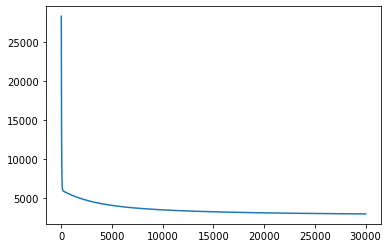

In [45]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [46]:
x_test[10], y_test[10]

(array([ 0.05987114,  0.05068012,  0.02289497,  0.04941532,  0.01631843,
         0.01183836, -0.01394774, -0.00259226,  0.03953988,  0.01963284]),
 232.0)

In [47]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

2658.2546122238437

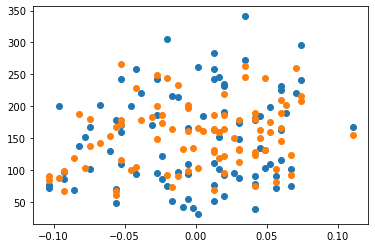

In [48]:
# x_test[:, 0]<-(특정 변수)는 y_test,prediction의 비교를 위해 x축에 세운 것이다
# x_test[:,1]이 되어도 상관은 없지만
# x_test[:, 0]이던 x_test[:, 1]이던 그래프의 개형을 보고 상관관계가 있어보이면
# 그 변수는 결과값과 어느정도 상관관계가 있다고도 볼 수 있다. 
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:,0], prediction)
plt.show()